In [5]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


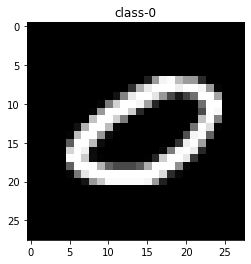

Train image 12553-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 154 244
  251 187 154 152  43   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [6]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/sysadm/Documents/sem_2_Biswajit_rana/RKMVERI_2ND/class/ML/SS_assignments_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
rand_ids=12553
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [78]:
# Your validation set extraction script/code 



In [7]:
train_reshape = np.array(train_images.reshape(60000, 28*28), dtype = np.float64)

np.random.seed(20)
train_random = np.random.choice(range(60000), 60000, replace = False)
train_df = train_reshape[train_random]

valid_img = train_df[:12000]
train_img = train_df[12000:]

random_lab = train_labels[train_random]
valid_lab = random_lab[:12000]
train_lab = random_lab[12000:]

test_img = np.array(test_images.reshape(10000, 28*28), dtype = np.float64)
print(test_img)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print(train_img.shape)
print(valid_img.shape)
print(train_lab.shape)
print(valid_lab.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


12553
1


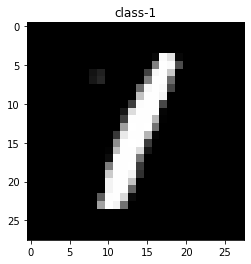

2798
2


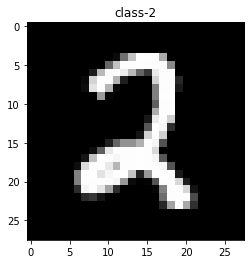

In [84]:
#peek

# rand_ids = np.random.choice(X_train.shape[0])
# print(rand_ids)
# print(y_train[rand_ids])
# plt.imshow(X_train[rand_ids, :].reshape(28,28), cmap='gray')
# plt.title('class-'+str(y_train[rand_ids]))
# plt.show()

# rand_ids = np.random.choice(X_val.shape[0])
# print(rand_ids)
# print(y_val[rand_ids])
# plt.imshow(X_val[rand_ids, :].reshape(28,28), cmap='gray')
# plt.title('class-'+str(y_val[rand_ids]))
# plt.show()

# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [49]:
# Your k-NN algorithm script/code 


In [9]:
# Your k-NN algorithm script/code 

# Distance Functions
# 1. euclidean
def euclid_dist(x):
    return np.linalg.norm(train_img - x, axis = 1)
# 2.Manhatten
def manhat_dist(x):
    return np.sum(np.abs(train_img - x), axis = 1)

# def chebyshev_dist(x):
#     return np.max(np.abs(train_img - x), axis = 1)

#Accuracy Function 
def acc_percentage(x,y):
    z = (np.array(x) == np.array(y))
    return (np.sum(z)*100)/len(x)

#////////////////////////////////////////////////////////////////////////////////////////////////////////

# Defining Prediction Function for k = 1, 3, 5,..., 25

def prediction(data, function):
    a = {} # Dictionary
    for i in range(1,26,2):
        a[i] = []
    for j in data:
        temp = function(j)
        temp_dataframe = pd.DataFrame(temp)
        temp_dataframe["label"] = train_lab
        temp_sort = temp_dataframe.sort_values(by = [0])
        for k in range(1,26,2):
            temp_k = temp_sort.iloc[0:k]
            b = temp_k.value_counts("label").index[0]
            a[k].append(b)
    print("The values of k are in column indexes and the values along column are predictions")
    return pd.DataFrame(a)
    

# Defining Prediction Function for a particular value of k
    
def prediction_k(data, k, function):
    a = {} # Dictionary
    for i in range(1,k+1,2):
        a[i] = []
    for j in data:
        temp = function(j)
        temp_dataframe = pd.DataFrame(temp)
        temp_dataframe["label"] = train_lab
        temp_sort = temp_dataframe.sort_values(by = [0])
        temp_k = temp_sort.iloc[0:k]
        b = temp_k.value_counts("label").index[0]
        a[k].append(b)
    print("The values of {} are in column indexes and the values along column are predictions". format(k))
    return pd.DataFrame(a[k]) 

The values of k are in column indexes and the values along column are predictions
       1   3   5   7   9   11  13  15  17  19  21  23  25
0       9   9   9   9   9   9   9   9   9   9   9   9   9
1       5   5   5   5   5   5   5   5   5   5   5   5   5
2       7   7   7   7   7   7   7   7   7   7   7   7   7
3       7   7   7   7   7   7   7   7   7   7   7   7   7
4       1   1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   2   2   2   2   2   2   2   2   2   2   2   2   2
11996   9   9   9   9   9   9   9   9   9   9   9   9   9
11997   8   8   8   8   8   8   8   8   8   8   8   8   8
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   4   4   4   4   4   4   4   4   4   9   9   9   9

[12000 rows x 13 columns]
CPU times: user 30min 11s, sys: 13min 40s, total: 43min 51s
Wall time: 44min 53s


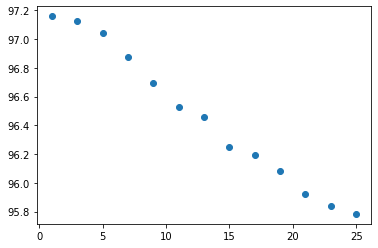

In [10]:
%%time
Euclid = prediction(valid_img, euclid_dist)
print(Euclid)
acc_Euclid = Euclid.apply(acc_percentage, y = valid_lab).sort_values(ascending = False)
acc_Euclid

# Finding the Highest k
Euclid_k_highest = acc_Euclid.index[0]
Euclid_k_highest
# Finding the Highest Accuracy
Euclid_Value = acc_Euclid.values[0];
Euclid_Value
plt.scatter(acc_Euclid.index, acc_Euclid.values)

In [11]:
acc_Euclid

1     97.158333
3     97.125000
5     97.041667
7     96.875000
9     96.691667
11    96.525000
13    96.458333
15    96.250000
17    96.191667
19    96.083333
21    95.925000
23    95.841667
25    95.783333
dtype: float64